# Fake News Detection

#### import library

In [17]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

Read the dataset

In [18]:
df = pd.read_csv("news.csv")

In [19]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [20]:
df.shape


(6335, 4)

"Checking if any value is missing from the dataset."

In [21]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [22]:
labels = df.label

In [23]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

#### split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.15, random_state = 20)

In [26]:
x_train.head()


1510    (CNN) CNN commentators and guest analysts offe...
5321    Authorities said in court papers Friday that t...
2961    Print \nA load of manure was dumped outside th...
877       \nPresident Obama is known for his humor, bu...
4778    John White may be the silver-tongued boy wonde...
Name: text, dtype: object

In [27]:
x_train.shape

(5384,)

In [28]:
x_test.shape

(951,)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


* Intitialisation of TfidfVectorizer

In [30]:
vector = TfidfVectorizer(stop_words='english',max_df=0.6)

* fit and transform

In [31]:
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Passive Aggressive Classifier

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier

#### Intialize a PassiveAggresiveClassifier

In [34]:
PAC = PassiveAggressiveClassifier(max_iter = 50)
PAC.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

#### Prediction on the test dataset

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = PAC.predict(tf_test)

In [36]:
score = accuracy_score(y_test,y_pred)

In [37]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 95.69%


### Confusion matrix

In [38]:
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[471,  16],
       [ 25, 439]], dtype=int64)

Confusion matrix, without normalization


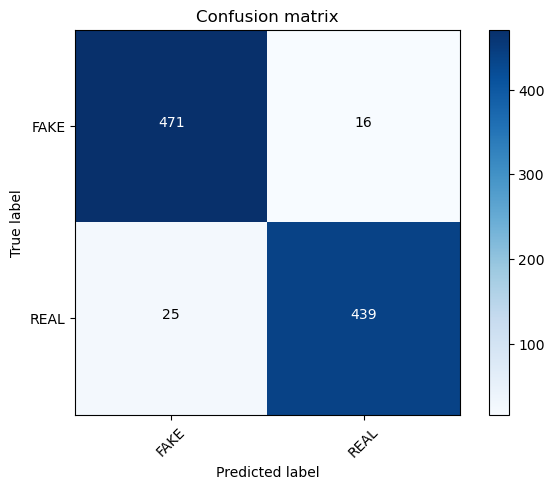

In [40]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Logistic Regression

In [41]:

from sklearn.linear_model import LogisticRegression

#### Intialize a LogisticRegression

In [42]:
LR = LogisticRegression(max_iter = 50)
LR.fit(tf_train,y_train)

LogisticRegression(max_iter=50)

 #### Prediction on the test dataset

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = LR.predict(tf_test)

In [44]:
score = accuracy_score(y_test,y_pred)

In [45]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 92.95%


### Confusion matrix

In [46]:
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[469,  18],
       [ 49, 415]], dtype=int64)

Confusion matrix, without normalization


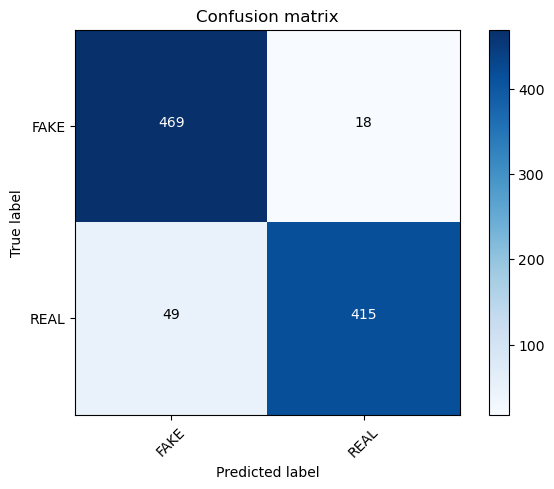

In [47]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

#### Intialize a DecisionTree

In [49]:
DT = DecisionTreeClassifier()
DT.fit(tf_train, y_train)

DecisionTreeClassifier()

#### Prediction on the test dataset

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = DT.predict(tf_test)

In [51]:
score = accuracy_score(y_test,y_pred)

In [52]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 81.07%


### Confusion matrix

In [53]:
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[403,  84],
       [ 96, 368]], dtype=int64)

Confusion matrix, without normalization


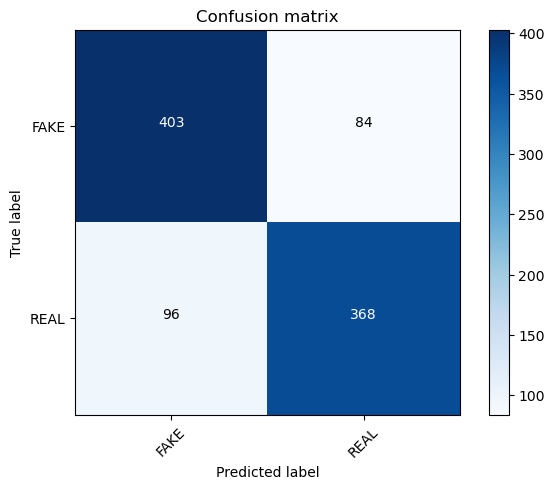

In [54]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

#### Intialize a RandomForestClassifier

In [56]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tf_train, y_train)

RandomForestClassifier(random_state=0)

#### Prediction on the test dataset

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = RFC.predict(tf_test)

In [58]:
score = accuracy_score(y_test,y_pred)

In [59]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 92.74%


### Confusion matrix

In [60]:
confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])

array([[456,  31],
       [ 38, 426]], dtype=int64)

Confusion matrix, without normalization


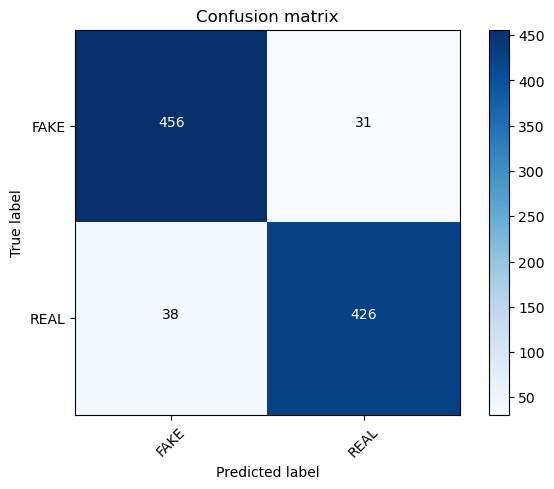

In [61]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### After using various algorithms, we found that the Passive Aggresive Classifier is having highest accuracy. So for this model we will proceed with Passive Aggresive Classifier.

In [62]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(PAC,open(filename,'wb'))

In [63]:
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename,'wb'))